In [3]:
import numpy as np
import matplotlib.pyplot as plt
import wandb
import pandas as pd
import os
import json
os.environ['WANDB_NOTEBOOK_NAME'] = 'results.ipynb'
wandb.login()
api = wandb.Api()

wandb: Currently logged in as: hojmax (rl-msps). Use `wandb login --relogin` to force relogin


In [3]:
run_paths = [
    "project-group-1/Paper-Implemenation/8l8heh1g",
    "project-group-1/Paper-Implemenation/biap89fa",
    "project-group-1/Paper-Implemenation/2zykyqzr"
]

In [4]:
type_plot = 'input'

In [5]:
run_tables = []

In [6]:
for run_path in run_paths:
    run = api.run(run_path)
    data = wandb.restore(
        run.summary[f'{type_plot}-zero-shot_table']['path'],
        run_path=run_path
    )
    json_data = json.load(data)
    run_tables.append(np.array(json_data['data']))

In [7]:
stacked = np.stack(list(map(lambda x: x[:, 1], run_tables)))
stacked

array([[0.        , 0.        , 0.        , 0.16210938, 0.25897129],
       [0.        , 0.        , 0.        , 0.16666667, 0.29066986],
       [0.        , 0.        , 0.        , 0.16666667, 0.16925837]])

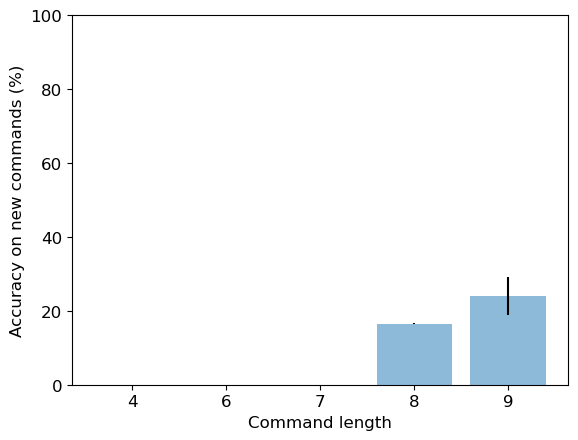

In [8]:
plt.rcParams.update({'font.size': 12})
# Change type to int
names = run_tables[0][:, 0].astype(int)
x_pos = np.arange(len(names))
bars = (stacked*100)    .mean(0)
error = (stacked*100).std(0)
fig, ax = plt.subplots()

ax.bar(
    x_pos,
    bars,
    yerr=error,
    align='center',
    alpha=0.5,
    ecolor='black',
)

plt.ylim([0,100])
if type_plot == 'output':
    ax.set_xlabel('Ground-truth action sequence length')
else:
    ax.set_xlabel('Command length')
ax.set_ylabel('Accuracy on new commands (%)')
ax.set_xticks(x_pos)
ax.set_xticklabels(names)
plt.savefig(f'./plots/plot3-ours-{type_plot}.png',bbox_inches='tight')
plt.show()

In [9]:
overall_best = [0.9876, 0.9998, 0.9665, 0.9892, 0.9919]
overall_avg = np.mean(np.array(overall_best)*100)
overall_std = np.std(np.array(overall_best)*100)
print('Experiment 1, Overall-best')
print(f'Accuracy: {overall_avg} +/- {overall_std}')

Experiment 1, Overall-best
Accuracy: 98.7 +/- 1.1075197515168733


In [10]:
best = [0.9993, 0.9995, 0.9947, 0.9983, 0.9988]
best_avg = np.mean(np.array(best)*100)
best_std = np.std(np.array(best)*100)
print('Experiment 1, Simple-best')
print(f'Accuracy: {best_avg} +/- {best_std}')

Experiment 1, Simple-best
Accuracy: 99.812 +/- 0.17599999999999952


In [11]:
accrucies = [0,0,0,0, 0.001687]
avg = np.mean(accrucies)
std = np.std(accrucies)
print('Experiment 3, Jump-best')
print(f'Accuracy: {avg} +/- {std}')

Experiment 3, Jump-best
Accuracy: 0.00033739999999999996 +/- 0.0006747999999999999


In [23]:
longer_overall = np.array([0.1375,0.1893,0.174])*100
longer_best = np.array([0.1452,0.152,0.1255,0.1243])*100

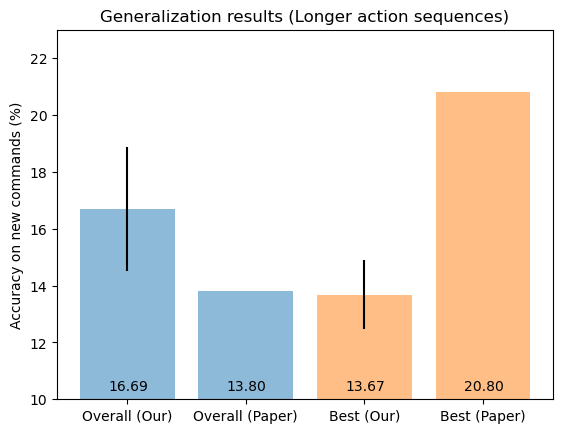

In [24]:
plt.rcParams.update({'font.size': 10})
names = ['Overall (Our)', 'Overall (Paper)', 'Best (Our)', 'Best (Paper)']
x_pos = np.arange(len(names))
bars = [np.mean(longer_overall), 13.8, np.mean(longer_best), 20.8]
error = [np.std(longer_overall), 0, np.std(longer_best), 0]
fig, ax = plt.subplots()

ax.bar(
    x_pos,
    bars,
    yerr=error,
    align='center',
    alpha=0.5,
    ecolor='black',
    color=['C0', 'C0', 'C1', 'C1']
)
ax.set_ylabel('Accuracy on new commands (%)')
ax.set_xticks(x_pos)
ax.set_xticklabels(names)

# Add values from bars to the bottom of the bars
for i in range(len(bars)):
    ax.text(
        x = x_pos[i]-0.16,
        y = 10 + 0.3,
        s = f"{bars[i]:.2f}",
        size = 10
    )


plt.ylim([10, 23])
plt.title('Generalization results (Longer action sequences)')
plt.savefig('./plots/plot.png')
plt.savefig('./plots/plot2-compare.png',bbox_inches='tight')
plt.show()

In [4]:
longer_overall = np.array([0.7442052980132451, 0.9271523178807948, 0.9710264900662252, 0.913907284768212, 0.8062913907284768])*100
longer_best = np.array([0.6771523178807947, 0.40811258278145696, 0.43543046357615894, 0.5115894039735099, 0.5281456953642384])*100

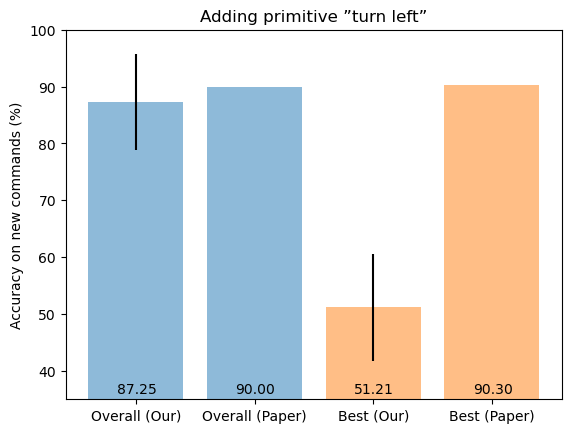

In [14]:
plt.rcParams.update({'font.size': 10})
names = ['Overall (Our)', 'Overall (Paper)', 'Best (Our)', 'Best (Paper)']
x_pos = np.arange(len(names))
bars = [np.mean(longer_overall), 90.0, np.mean(longer_best), 90.3]
error = [np.std(longer_overall), 0, np.std(longer_best), 0]
fig, ax = plt.subplots()

ax.bar(
    x_pos,
    bars,
    yerr=error,
    align='center',
    alpha=0.5,
    ecolor='black',
    color=['C0', 'C0', 'C1', 'C1']
)
ax.set_ylabel('Accuracy on new commands (%)')
ax.set_xticks(x_pos)
ax.set_xticklabels(names)

# Add values from bars to the bottom of the bars
for i in range(len(bars)):
    ax.text(
        x = x_pos[i]-0.16,
        y = 35 + 1,
        s = f"{bars[i]:.2f}",
        size = 10
    )


plt.ylim([35, 100])
plt.title('Adding primitive ”turn left”')
plt.savefig('./plots/plot.png')
plt.savefig('./plots/plot3-turn-left.png',bbox_inches='tight')
plt.show()

In [15]:
longer_overall = np.array([0.0007786140669608098, 0.0003893070334804049, 0.0010381520892810796, 0, 0.0014274591227614846])*100
longer_best = np.array([0.0002595380223202699, 0, 0, 0, 0])*100

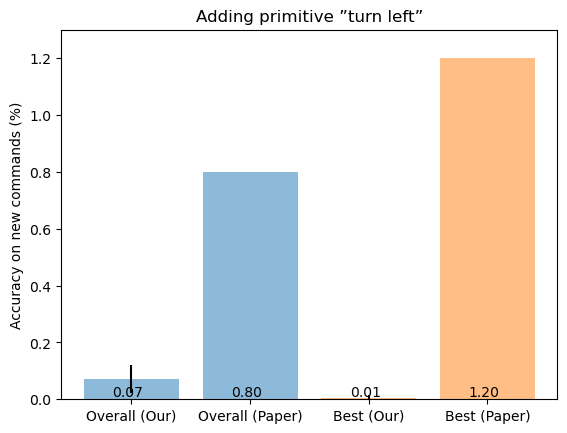

In [26]:
plt.rcParams.update({'font.size': 10})
names = ['Overall (Our)', 'Overall (Paper)', 'Best (Our)', 'Best (Paper)']
x_pos = np.arange(len(names))
bars = [np.mean(longer_overall), 0.08, np.mean(longer_best), 1.2]
error = [np.std(longer_overall), 0, np.std(longer_best), 0]
fig, ax = plt.subplots()

ax.bar(
    x_pos,
    bars,
    yerr=error,
    align='center',
    alpha=0.5,
    ecolor='black',
    color=['C0', 'C0', 'C1', 'C1']
)
ax.set_ylabel('Accuracy on new commands (%)')
ax.set_xticks(x_pos)
ax.set_xticklabels(names)
offset_x = 0
# Add values from bars to the bottom of the bars
for i in range(len(bars)):
    ax.text(
        x = x_pos[i]-0.16,
        y = offset_x + 0.01,
        s = f"{bars[i]:.2f}",
        size = 10
    )


plt.ylim([offset_x, 1.3])
plt.title('Adding primitive ”turn left”')
plt.savefig('./plots/plot.png')
plt.savefig('./plots/plot3-turn-left.png',bbox_inches='tight')
plt.show()

In [ ]:
plt.rcParams.update({'font.size': 10})
names = ['Overall (Our)', 'Overall (Paper)', 'Best (Our)', 'Best (Paper)']
x_pos = np.arange(len(names))
bars = [overall_avg, 99.7, best_avg, 99.8]
error = [overall_std, 0, best_std, 0]
fig, ax = plt.subplots()

ax.bar(
    x_pos,
    bars,
    yerr=error,
    align='center',
    alpha=0.5,
    ecolor='black',
    color=['C0', 'C0', 'C1', 'C1']
)
ax.set_ylabel('Accuracy on new commands (%)')
ax.set_xticks(x_pos)
ax.set_xticklabels(names)

# Add values from bars to the bottom of the bars
for i in range(len(bars)):
    ax.text(
        x = x_pos[i]-0.16,
        y = 90 + 0.3,
        s = f"{bars[i]:.2f}",
        size = 10
    )


plt.ylim([90, 101])
plt.title('Generalization results (80% 20% split)')
plt.savefig('./plots/plot.png')
plt.savefig('./plots/plot2-compare.png',bbox_inches='tight')
plt.show()

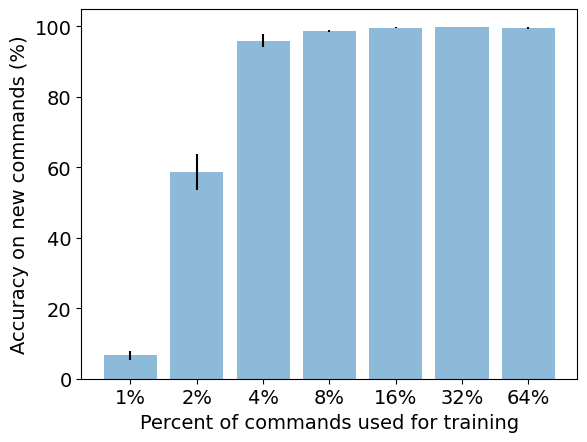

In [36]:
accuracies = [
    [0.0714, 0.04836, 0.06174, 0.06676, 0.08719],
    [0.5073, 0.5723, 0.6624, 0.6162, 0.5782],
    [0.9333, 0.9521, 0.9709, 0.9822],
    [0.9843, 0.9862, 0.99,],
    [0.9973, 0.9972, 0.9974, 0.9954],
    [0.997, 0.9977, 0.9995],
    [0.9903, 0.9961, 0.9987]
]
plt.rcParams.update({'font.size': 14})
names = ['1%', '2%', '4%', '8%', '16%', '32%', '64%']
x_pos = np.arange(len(names))
bars = [np.mean(np.array(sublist)*100) for sublist in accuracies]
error = [np.std(np.array(sublist)*100) for sublist in accuracies]
fig, ax = plt.subplots()

ax.bar(
    x_pos,
    bars,
    yerr=error,
    align='center',
    alpha=0.5,
    ecolor='black'
)
ax.set_xlabel('Percent of commands used for training')
ax.set_ylabel('Accuracy on new commands (%)')
ax.set_xticks(x_pos)
ax.set_xticklabels(names)
plt.savefig('./plots/plot1-ours.png', bbox_inches='tight')
plt.show()
